In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### For this assignment, we'll be looking at Citibike usage data from March 2020

In [2]:
df_bike_mar20 = pd.read_csv('https://s3.amazonaws.com/tripdata/202003-citibike-tripdata.csv.zip')

In [3]:
df_bike_mar20.shape

(1068457, 15)

In [4]:
df_bike_mar20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068457 entries, 0 to 1068456
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tripduration             1068457 non-null  int64  
 1   starttime                1068457 non-null  object 
 2   stoptime                 1068457 non-null  object 
 3   start station id         1068457 non-null  int64  
 4   start station name       1068457 non-null  object 
 5   start station latitude   1068457 non-null  float64
 6   start station longitude  1068457 non-null  float64
 7   end station id           1068457 non-null  int64  
 8   end station name         1068457 non-null  object 
 9   end station latitude     1068457 non-null  float64
 10  end station longitude    1068457 non-null  float64
 11  bikeid                   1068457 non-null  int64  
 12  usertype                 1068457 non-null  object 
 13  birth year               1068457 non-null 

In [5]:
df_bike_mar20.describe().round(2)

tripduration  start station id  start station latitude  \
count    1068457.00        1068457.00              1068457.00   
mean        1160.83           1809.89                   40.74   
std        13946.59           1511.14                    0.03   
min           61.00             72.00                   40.66   
25%          379.00            401.00                   40.72   
50%          680.00            530.00                   40.74   
75%         1246.00           3360.00                   40.76   
max      3247190.00           3919.00                   40.82   

       start station longitude  end station id  end station latitude  \
count               1068457.00      1068457.00            1068457.00   
mean                    -73.98         1804.10                 40.74   
std                       0.02         1511.58                  0.03   
min                     -74.02           72.00                 40.66   
25%                     -73.99          398.00                 40.72   
50%                     -73.98          529.00                 40.74   
75%                     -73.97         3360.00                 40.76   
max                     -73.90         3919.00                 40.82   

       end station longitude      bikeid  birth year      gender  
count             1068457.00  1068457.00  1068457.00  1068457.00  
mean                  -73.98    33307.91     1979.90        1.17  
std                     0.02     8231.19       12.53        0.54  
min                   -74.07    14530.00     1885.00        0.00  
25%                   -73.99    28841.00     1969.00        1.00  
50%                   -73.98    35221.00     1982.00        1.00  
75%                   -73.97    40136.00     1990.00        1.00  
max                   -73.90    43878.00     2004.00        2.00

### Let's translate some of the columns to more usable fields

In [42]:
#we have the birth year, but I want the age
df_bike_mar20['age'] = pd.Timestamp.today().year - df_bike_mar20['birth year']

In [7]:
#we have starttime and stoptime date and timestamps, but it'd be easier to work with normalized dates and hours. will assume trips complete same day
df_bike_mar20['startdaynum'] = pd.to_datetime(df_bike_mar20['starttime']).dt.day

In [8]:
df_bike_mar20['starthour'] = pd.to_datetime(df_bike_mar20['starttime']).dt.hour

In [9]:
#tripduration is in seconds but minutes would be more useful
df_bike_mar20['tripminutes'] = df_bike_mar20.tripduration // 60

In [43]:
df_bike_mar20.head()

tripduration                 starttime                  stoptime  \
0          1589  2020-03-01 00:00:03.6400  2020-03-01 00:26:32.9860   
1           389  2020-03-01 00:00:16.7560  2020-03-01 00:06:46.0620   
2           614  2020-03-01 00:00:20.0580  2020-03-01 00:10:34.2200   
3           597  2020-03-01 00:00:24.3510  2020-03-01 00:10:22.3390   
4          1920  2020-03-01 00:00:26.1120  2020-03-01 00:32:26.2680   

   start station id        start station name  start station latitude  \
0               224     Spruce St & Nassau St               40.711464   
1               293     Lafayette St & E 8 St               40.730207   
2               379           W 31 St & 7 Ave               40.749156   
3              3739  Perry St & Greenwich Ave               40.735918   
4               236       St Marks Pl & 2 Ave               40.728419   

   start station longitude  end station id             end station name  \
0               -74.005524            3574  Prospect Pl & Underhill Ave   
1               -73.991026             223              W 13 St & 7 Ave   
2               -73.991600             515             W 43 St & 10 Ave   
3               -74.000939             325              E 19 St & 3 Ave   
4               -73.987140            3124                46 Ave & 5 St   

   end station latitude  ...  bikeid    usertype birth year  gender  age  \
0             40.676969  ...   16214  Subscriber       1980       1   42   
1             40.737815  ...   29994  Subscriber       1991       2   31   
2             40.760094  ...   39853  Subscriber       1991       1   31   
3             40.736245  ...   42608  Subscriber       1989       1   33   
4             40.747310  ...   36288  Subscriber       1993       1   29   

   startdaynum  starthour  tripminutes  weekday  weekend  
0            1          0           26        6     True  
1            1          0            6        6     True  
2            1          0           10        6     True  
3            1          0            9        6     True  
4            1          0           32        6     True  

[5 rows x 21 columns]

### Now we'll perform some descriptive analysis, starting with age distribution across rides

<AxesSubplot:ylabel='Frequency'>

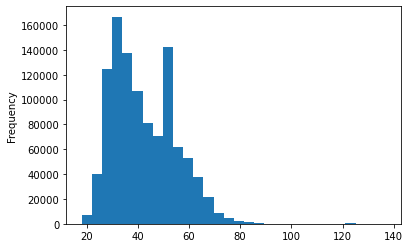

In [44]:
df_bike_mar20.age.plot(kind = 'hist', bins = 30)

### Seems like the primary age demographic is in the 25-35 age group, with a curious spike around 50 as well

### How about the split between subscribers and customers (single-ride riders)?

<AxesSubplot:ylabel='usertype'>

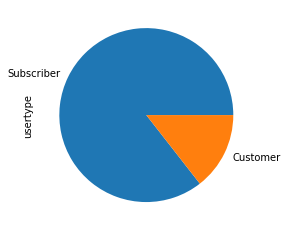

In [12]:
df_bike_mar20.usertype.value_counts(normalize = 'True').plot(kind = 'pie')

### Use seaborn to visualize rides at times of day

<AxesSubplot:xlabel='starthour', ylabel='count'>

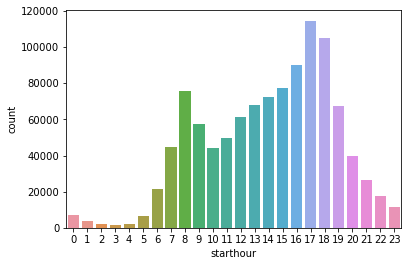

In [13]:
sns.countplot(data = df_bike_mar20, x = "starthour")

### Majority of rides happen during daylight hours, peaking during the morning and especially the evening rush hours.

### March 2020 is unique. Let's look at rides per day.

<AxesSubplot:xlabel='startdaynum', ylabel='count'>

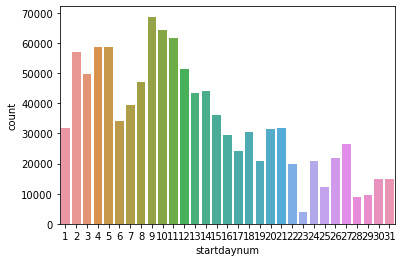

In [14]:
sns.countplot(data = df_bike_mar20, x = 'startdaynum')

### Seems there is a steady decline starting on the 9th, which coincides with the outbreak of COVID cases in NYC and the subsequent lockdown declaration. But even before that, there seem to be valleys every 4-5 days, which may correspond to weekends. Let's try to confirm.

In [15]:
df_bike_mar20['weekday'] = pd.to_datetime(df_bike_mar20['starttime']).dt.weekday

In [16]:
df_bike_mar20['weekend'] = np.where(df_bike_mar20['weekday'] > 4, True, False)
df_bike_mar20.head()

tripduration                 starttime                  stoptime  \
0          1589  2020-03-01 00:00:03.6400  2020-03-01 00:26:32.9860   
1           389  2020-03-01 00:00:16.7560  2020-03-01 00:06:46.0620   
2           614  2020-03-01 00:00:20.0580  2020-03-01 00:10:34.2200   
3           597  2020-03-01 00:00:24.3510  2020-03-01 00:10:22.3390   
4          1920  2020-03-01 00:00:26.1120  2020-03-01 00:32:26.2680   

   start station id        start station name  start station latitude  \
0               224     Spruce St & Nassau St               40.711464   
1               293     Lafayette St & E 8 St               40.730207   
2               379           W 31 St & 7 Ave               40.749156   
3              3739  Perry St & Greenwich Ave               40.735918   
4               236       St Marks Pl & 2 Ave               40.728419   

   start station longitude  end station id             end station name  \
0               -74.005524            3574  Prospect Pl & Underhill Ave   
1               -73.991026             223              W 13 St & 7 Ave   
2               -73.991600             515             W 43 St & 10 Ave   
3               -74.000939             325              E 19 St & 3 Ave   
4               -73.987140            3124                46 Ave & 5 St   

   end station latitude  ...  bikeid    usertype birth year  gender  age  \
0             40.676969  ...   16214  Subscriber       1980       1   42   
1             40.737815  ...   29994  Subscriber       1991       2   31   
2             40.760094  ...   39853  Subscriber       1991       1   31   
3             40.736245  ...   42608  Subscriber       1989       1   33   
4             40.747310  ...   36288  Subscriber       1993       1   29   

   startdaynum  starthour  tripminutes  weekday  weekend  
0            1          0           26        6     True  
1            1          0            6        6     True  
2            1          0           10        6     True  
3            1          0            9        6     True  
4            1          0           32        6     True  

[5 rows x 21 columns]

<AxesSubplot:xlabel='startdaynum', ylabel='count'>

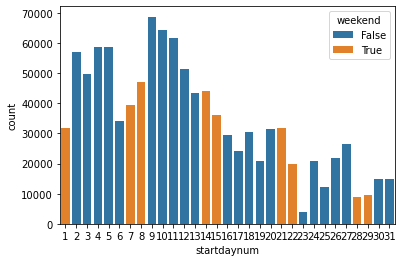

In [17]:
sns.countplot(data = df_bike_mar20, x = "startdaynum", hue = 'weekend', dodge=False)

### Seems to be the case but it'd be better to check some pre-pandemic months, like Jan and Feb

In [18]:
df_bike_jan20 = pd.read_csv('https://s3.amazonaws.com/tripdata/202001-citibike-tripdata.csv.zip')

In [19]:
df_bike_feb20 = pd.read_csv('https://s3.amazonaws.com/tripdata/202002-citibike-tripdata.csv.zip')

In [20]:
#Union the two datasets using concat
df_bike_prepan = df_students = pd.concat([df_bike_jan20, df_bike_feb20]).reset_index(drop = True)

In [21]:
df_bike_prepan

tripduration                 starttime                  stoptime  \
0                 789  2020-01-01 00:00:55.3900  2020-01-01 00:14:05.1470   
1                1541  2020-01-01 00:01:08.1020  2020-01-01 00:26:49.1780   
2                1464  2020-01-01 00:01:42.1400  2020-01-01 00:26:07.0110   
3                 592  2020-01-01 00:01:45.5610  2020-01-01 00:11:38.1550   
4                 702  2020-01-01 00:01:45.7880  2020-01-01 00:13:28.2400   
...               ...                       ...                       ...   
2387421           203  2020-02-29 23:58:48.0230  2020-03-01 00:02:11.6640   
2387422           357  2020-02-29 23:58:52.5640  2020-03-01 00:04:50.5370   
2387423           169  2020-02-29 23:58:54.5820  2020-03-01 00:01:43.7770   
2387424           738  2020-02-29 23:58:58.8110  2020-03-01 00:11:17.7390   
2387425           960  2020-02-29 23:59:35.6070  2020-03-01 00:15:35.6490   

         start station id               start station name  \
0                     504                  1 Ave & E 16 St   
1                    3423  West Drive & Prospect Park West   
2                    3687                  E 33 St & 1 Ave   
3                     346              Bank St & Hudson St   
4                     372        Franklin Ave & Myrtle Ave   
...                   ...                              ...   
2387421              3737          Stanton St & Norfolk St   
2387422               546             E 30 St & Park Ave S   
2387423              3043           Lewis Ave & Decatur St   
2387424              3255                  8 Ave & W 31 St   
2387425               379                  W 31 St & 7 Ave   

         start station latitude  start station longitude  end station id  \
0                     40.732219               -73.981656             307   
1                     40.661063               -73.979453            3300   
2                     40.743227               -73.974498             259   
3                     40.736529               -74.006180             490   
4                     40.694546               -73.958014            3637   
...                         ...                      ...             ...   
2387421               40.720747               -73.986274             317   
2387422               40.744449               -73.983035            3463   
2387423               40.681460               -73.934903            3052   
2387424               40.750585               -73.994685             497   
2387425               40.749156               -73.991600            3744   

                  end station name  end station latitude  \
0            Canal St & Rutgers St             40.714275   
1        Prospect Park West & 8 St             40.665147   
2          South St & Whitehall St             40.701221   
3                  8 Ave & W 33 St             40.751551   
4          Fulton St & Waverly Ave             40.683239   
...                            ...                   ...   
2387421          E 6 St & Avenue B             40.724537   
2387422        E 16 St & Irving Pl             40.735367   
2387423     Lewis Ave & Madison St             40.686312   
2387424         E 17 St & Broadway             40.737050   
2387425             1 Ave & E 5 St             40.725864   

         end station longitude  bikeid    usertype  birth year  gender  
0                   -73.989900   30326  Subscriber        1992       1  
1                   -73.976376   17105    Customer        1969       1  
2                   -74.012342   40177  Subscriber        1963       1  
3                   -73.993934   27690  Subscriber        1980       1  
4                   -73.965996   32583  Subscriber        1982       1  
...                        ...     ...         ...         ...     ...  
2387421             -73.981854   39094  Subscriber        1993       2  
2387422             -73.987974   40722  Subscriber        1966       2  
2387423             -73.935775   28696  Subscrib

In [28]:
df_bike_prepan['startdate'] = pd.to_datetime(df_bike_prepan['starttime']).dt.normalize()

In [29]:
df_bike_prepan

tripduration                 starttime                  stoptime  \
0                 789  2020-01-01 00:00:55.3900  2020-01-01 00:14:05.1470   
1                1541  2020-01-01 00:01:08.1020  2020-01-01 00:26:49.1780   
2                1464  2020-01-01 00:01:42.1400  2020-01-01 00:26:07.0110   
3                 592  2020-01-01 00:01:45.5610  2020-01-01 00:11:38.1550   
4                 702  2020-01-01 00:01:45.7880  2020-01-01 00:13:28.2400   
...               ...                       ...                       ...   
2387421           203  2020-02-29 23:58:48.0230  2020-03-01 00:02:11.6640   
2387422           357  2020-02-29 23:58:52.5640  2020-03-01 00:04:50.5370   
2387423           169  2020-02-29 23:58:54.5820  2020-03-01 00:01:43.7770   
2387424           738  2020-02-29 23:58:58.8110  2020-03-01 00:11:17.7390   
2387425           960  2020-02-29 23:59:35.6070  2020-03-01 00:15:35.6490   

         start station id               start station name  \
0                     504                  1 Ave & E 16 St   
1                    3423  West Drive & Prospect Park West   
2                    3687                  E 33 St & 1 Ave   
3                     346              Bank St & Hudson St   
4                     372        Franklin Ave & Myrtle Ave   
...                   ...                              ...   
2387421              3737          Stanton St & Norfolk St   
2387422               546             E 30 St & Park Ave S   
2387423              3043           Lewis Ave & Decatur St   
2387424              3255                  8 Ave & W 31 St   
2387425               379                  W 31 St & 7 Ave   

         start station latitude  start station longitude  end station id  \
0                     40.732219               -73.981656             307   
1                     40.661063               -73.979453            3300   
2                     40.743227               -73.974498             259   
3                     40.736529               -74.006180             490   
4                     40.694546               -73.958014            3637   
...                         ...                      ...             ...   
2387421               40.720747               -73.986274             317   
2387422               40.744449               -73.983035            3463   
2387423               40.681460               -73.934903            3052   
2387424               40.750585               -73.994685             497   
2387425               40.749156               -73.991600            3744   

                  end station name  end station latitude  \
0            Canal St & Rutgers St             40.714275   
1        Prospect Park West & 8 St             40.665147   
2          South St & Whitehall St             40.701221   
3                  8 Ave & W 33 St             40.751551   
4          Fulton St & Waverly Ave             40.683239   
...                            ...                   ...   
2387421          E 6 St & Avenue B             40.724537   
2387422        E 16 St & Irving Pl             40.735367   
2387423     Lewis Ave & Madison St             40.686312   
2387424         E 17 St & Broadway             40.737050   
2387425             1 Ave & E 5 St             40.725864   

         end station longitude  bikeid    usertype  birth year  gender  \
0                   -73.989900   30326  Subscriber        1992       1   
1                   -73.976376   17105    Customer        1969       1   
2                   -74.012342   40177  Subscriber        1963       1   
3                   -73.993934   27690  Subscriber        1980       1   
4                   -73.965996   32583  Subscriber        1982       1   
...                        ...     ...         ...         ...     ...   
2387421             -73.981854   39094  Subscriber        1993       2   
2387422             -73.987974   40722  Subscriber        1966       2   
2387423             -73.935775   28696 

In [23]:
df_bike_prepan['weekday'] = pd.to_datetime(df_bike_prepan['starttime']).dt.weekday

In [24]:
df_bike_prepan['weekend'] = np.where(df_bike_prepan['weekday'] > 4, True, False)

[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, ''),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, ''),
  Text(20, 0, ''),
  Text(21, 0, ''),
  Text(22, 0, ''),
  Text(23, 0, ''),
  Text(24, 0, ''),
  Text(25, 0, ''),
  Text(26, 0, ''),
  Text(27, 0, ''),
  Text(28, 0, ''),
  Text(29, 0, ''),
  Text(30, 0, ''),
  Text(31, 0, ''),
  Text(32, 0, ''),
  Text(33, 0, ''),
  Text(34, 0, ''),
  Text(35, 0, ''),
  Text(36, 0, ''),
  Text(37, 0, ''),
  Text(38, 0, ''),
  Text(39, 0, ''),
  Text(40, 0, ''),
  Text(41, 0, ''),
  Text(42, 0, ''),
  Text(43, 0, ''),
  Text(44, 0, ''),
  Text(45, 0, ''),
  Text(46, 0, ''),
  Text(47, 0, ''),
  Text(48, 0, ''),
  Text(49, 0, ''),
  Text(50, 0, ''),
  Text(51, 0, ''),
  Text(52, 0, ''),
  T

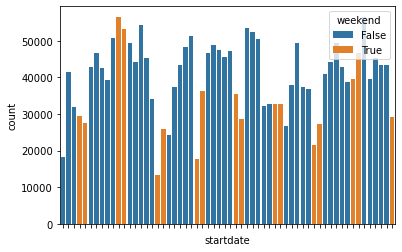

In [35]:
sns.countplot(data = df_bike_prepan, x = "startdate", hue = 'weekend', dodge = False).set(xticklabels = [])

### Setting aside my crude way of removing overlapping date tick labels, one can see there is a clear decrease in rides over the weekends and also holidays like MLK and Presidents Day as well. 